In [2]:
import os
import shutil
from tensorflow.python.client import device_lib
import keras
from keras import layers, models, optimizers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications import EfficientNetB7, ResNet50
from keras.preprocessing import image
from keras.models import Model
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import load_img
from PIL import Image
from keras.utils import to_categorical 


import matplotlib.pyplot as plt

In [3]:
# Dataset personnes
!git clone https://gitlab.enseeiht.fr/aandre2/Dataset_Market-1501-v15.09.15

# Dataset pokemons
!git clone https://gitlab.enseeiht.fr/nurbani/dataset-pokemon


Cloning into 'Dataset_Market-1501-v15.09.15'...
remote: Counting objects: 77323, done.
remote: Compressing objects: 100% (70371/70371), done.
remote: Total 77323 (delta 6952), reused 77323 (delta 6952)
Receiving objects: 100% (77323/77323), 129.42 MiB | 23.01 MiB/s, done.
Resolving deltas: 100% (6952/6952), done.
Checking out files: 100% (143817/143817), done.
Cloning into 'dataset-pokemon'...
remote: Counting objects: 26364, done.
remote: Compressing objects: 100% (25090/25090), done.
remote: Total 26364 (delta 1274), reused 26364 (delta 1274)
Receiving objects: 100% (26364/26364), 26.87 MiB | 15.76 MiB/s, done.
Resolving deltas: 100% (1274/1274), done.


On commence par les chemins

In [4]:
path_pokemon = "/content/dataset-pokemon/"

In [5]:
#Chemin vers les pokemon qu'on va utiliser
pokemon_1G_red_blue = os.listdir(path_pokemon + '1G-red-blue')[:151]
pokemon_1G_red_green = os.listdir(path_pokemon + '1G-red-green')[:151]
pokemon_1G_yellow = os.listdir(path_pokemon + '1G-yellow')[:151]
pokemon_2G_crystal = os.listdir(path_pokemon + '2G-crystal')[:151]
pokemon_2G_gold = os.listdir(path_pokemon + '2G-gold')[:151]
pokemon_2G_silver = os.listdir(path_pokemon + '2G-silver')[:151]
pokemon_3G_emerald = os.listdir(path_pokemon + '3G-emerald')[:151]
pokemon_3G_firered_leafgreen = os.listdir(path_pokemon + '3G-firered-leafgreen')[:151]
pokemon_3G_ruby_sapphire = os.listdir(path_pokemon + '3G-ruby-sapphire')[:151]
pokemon_4G_diamond_pearl = os.listdir(path_pokemon + '4G-diamond-pearl')[:151]
pokemon_4G_heartgold_soulsilver = os.listdir(path_pokemon + '4G-heartgold-soulsilver')[:151]
pokemon_4G_platinum = os.listdir(path_pokemon + '4G-platinum')[:151]
pokemon_5G_black_white = os.listdir(path_pokemon + '5G-black-white')[:151]

Création du fichier de données d'entraînement

Ici, on prendra comme données d'entraînement : les 4 premières générations sauf platine





In [6]:
# path train
path_train_pokemon = path_pokemon + "train/"

# train folder
if not os.path.exists(path_train_pokemon):
  os.mkdir(path_train_pokemon)

# train images
for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "1G-red-blue/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-1G-red-blue.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "1G-red-green/" + str(filename) +'.png', path_train_pokemon + str(filename) + '-1G-red-green.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "1G-yellow/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-1G-yellow.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "2G-crystal/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-2G-crystal.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "2G-gold/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-2G-gold.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "2G-silver/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-2G-silver.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "3G-emerald/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-3G-emerald.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "3G-firered-leafgreen/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-3G-firered-leafgreen.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "3G-ruby-sapphire/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-3G-ruby-sapphire.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "4G-diamond-pearl/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-4G-diamond-perl.png')

for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "4G-heartgold-soulsilver/" + str(filename) + '.png', path_train_pokemon + str(filename) + '-4G-heartgold-soulsilver.png')

# train labels
train_filenames = os.listdir(path_train_pokemon)
train_categories=[]
for filename in train_filenames:
    train_categories.append(filename.split('-')[0])

#train_categories = to_categorical(train_categories)


Création du fichier des données de validation

Données de validation : 4G version platine


In [7]:
# path validation
path_validation_pokemon = path_pokemon + "validation/"

# validation folder
if not os.path.exists(path_validation_pokemon):
  os.mkdir(path_validation_pokemon)


# Creation
if not os.path.exists(path_validation_pokemon):
  os.mkdir(path_validation_pokemon)

# Validation images
for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "4G-platinum/" + str(filename) + '.png', path_validation_pokemon + str(filename) + '-4G-platinum.png')

# validation labels
validation_filenames = os.listdir(path_validation_pokemon)
validation_categories=[]
for filename in validation_filenames:
  validation_categories.append(filename.split('-')[0])

#validation_categories = to_categorical(validation_categories)

Création du fichier des données de test

Données de test : 5G version blanc/noir



In [8]:
# path test
path_test_pokemon = path_pokemon + "test/"

# testfolder
if not os.path.exists(path_test_pokemon):
  os.mkdir(path_test_pokemon)


# Test images
for filename in range(1, 152):
  shutil.copyfile(path_pokemon + "5G-black-white/" + str(filename) + '.png', path_test_pokemon + str(filename) + '-5G-black-white.png')

# Test labels
test_filenames = os.listdir(path_test_pokemon)
test_categories=[]
for filename in test_filenames:
  test_categories.append(filename.split('-')[0])

#test_categories = to_categorical(test_categories)

Création des ensemble d'apprentissage, test et validation. Sous format pandas





In [9]:
#Images d'entrainement
train_df = pd.DataFrame({
    'filename': train_filenames,
    'category': train_categories
})


#Images de validation
validation_df = pd.DataFrame({
    'filename': validation_filenames,
    'category': validation_categories
})


#Images de test
test_df = pd.DataFrame({
    'filename': test_filenames,
    'category': test_categories
})


train_df['category'] = train_df['category'].astype(str)
validation_df['category'] = validation_df['category'].astype(str)
test_df['category'] = validation_df['category'].astype(str)

total_train = train_df.shape[0]
total_validate = validation_df.shape[0]

Génération aléatoire d'un pokemon ...

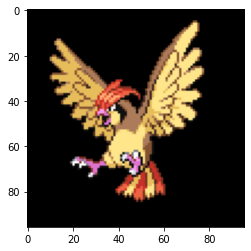

In [10]:
import random
from keras.preprocessing.image import load_img

sample = random.choice(test_filenames)
image = load_img(path_test_pokemon + sample)
plt.imshow(image)
plt.show()

On utilisera comme métrique, les top5 et top10 accuracies

In [11]:
import keras.metrics as metrics
def top5_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=5)

def top10_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=10)

Vérification que 1/255 /=/ 0

In [12]:
print(1/255)

0.00392156862745098


Nous utilisons la biliothèque "ImageDataGenerator" pour le traitement de nos données. Ici, nous faisons uniquement une normalisation



In [13]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16
image_size = 84


#Images d'entrainement
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path_train_pokemon,
    x_col='filename',
    y_col='category',
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

#Images de validation
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df, 
    path_validation_pokemon, 
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

#Images de test
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    path_test_pokemon, 
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1661 validated image filenames belonging to 151 classes.
Found 151 validated image filenames belonging to 151 classes.
Found 151 validated image filenames belonging to 151 classes.


Entraînement du réseau de neurone.

On utilise un VGG pré-entraîné sur imagenet



Import VGG

In [14]:
# #VGG pré entraîné sur imagenet
# model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
# model_vgg16_conv.summary()

# #Mon input c'est du 40 40 3
# input = Input(shape=(32, 32, 3),name = 'image_input')

# output_vgg16_conv = model_vgg16_conv(input)

# #On rajoute quelques layers
# x = Flatten(name='flatten')(output_vgg16_conv)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
# x = Dense(151, activation='softmax', name='predictions')(x)

# #Mon modele à moi
# my_model = Model(inputs=input, outputs=x)

# my_model.summary()

C'est parti pour l'entraînnement !

In [15]:
# my_model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.Adam(lr=3e-4),
#               metrics=['acc'])

In [16]:
# history = my_model.fit(train_generator,
#                     steps_per_epoch=total_train//batch_size,
#                     validation_data=validation_generator,
#                     validation_steps=total_validate//batch_size,
#                     epochs=100,
#                     )

Fonction qui analyse les résultats

In [17]:
def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  top5_acc = history.history['top5_acc']
  top10_acc = history.history['top10_acc']
  val_top5_acc = history.history['val_top5_acc']
  val_top10_acc = history.history['val_top10_acc']


  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

  plt.plot(epochs, top5_acc, 'b', linestyle="--",label='Top 5 accuracy')
  plt.plot(epochs, val_top5_acc, 'g', label='Validation Top 5 accuracy')
  plt.title('Top 5 Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, top10_acc, 'b', linestyle="--",label='Top 10 accuracy')
  plt.plot(epochs, val_top10_acc, 'g', label='Validation top 10 accuracy')
  plt.title('Top 10 Training and validation accuracy')
  plt.legend()

  plt.figure()

In [18]:
# #VGG pré entraîné sur imagenet
# model_efficient_net = EfficientNetB7(include_top=False, weights="imagenet", classes=151,classifier_activation="softmax",)
# model_efficient_net.summary()

# #Mon input c'est du 40 40 3
# input = Input(shape=(32, 32, 3), name = 'image_input')

# output_efficient_net = model_efficient_net(input)

# #On rajoute quelques layers
# x = Flatten(name='flatten')(output_efficient_net)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
# x = Dense(151, activation='softmax', name='predictions')(x)

# #Mon modele à moi
# my_model_2 = Model(inputs=input, outputs=x)

# my_model_2.summary()

In [19]:
# my_model_2.compile(loss='binary_crossentropy',
#               optimizer=optimizers.Adam(lr=3e-4),
#               metrics=['acc'])

In [20]:
# history = my_model_2.fit(train_generator,
#                     steps_per_epoch=total_train//batch_size,
#                     validation_data=validation_generator,
#                     validation_steps=total_validate//batch_size,
#                     epochs=100,
#                     )

In [21]:
# plot_training_analysis()

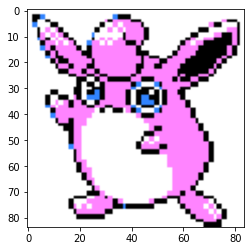

In [22]:
x, y = train_generator.next()
for i in range(0, 1):
    image = x[i]
    plt.imshow(image)
    plt.show()

VGG et Efficient net ont plus de 100M de paramètres, ce qui est bien trop gros pour ma petite base d'apprentissage de 1661 images


Nous allons plutôt utiliser un ResNet avec 33M de paramètres pré-entraînés, et 9M de nouveaux paramètres entraînable.

In [52]:
conv_resnet = ResNet50(
              include_top=False,
              weights="imagenet",
              input_shape=(84, 84, 3),
              classes=151
)

conv_resnet.trainable = True

for layer in conv_resnet.layers:
    if layer.name == "res5c_branch2a" or layer.name == "res5c_branch2b" or layer.name == "res5c_branch2c":
      layer.trainable = True  
    else:
      layer.trainable = False

#Mon input c'est du 32 32 3
input = Input(shape=(84, 84, 3), name = 'image_input')

output_resnet = conv_resnet(input)

#On rajoute quelques layers
x = Flatten(name='flatten')(output_resnet)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dropout(0.2)(x)
x = Dense(151, activation='softmax', name='predictions')(x)

#Mon modele à moi
my_model_3 = Model(inputs=input, outputs=x)

my_model_3.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 84, 84, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               4718848   
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 256)               65792     
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0   

In [53]:
my_model_3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=["acc", top5_acc, top10_acc]
)

In [ ]:
history = my_model_3.fit(train_generator,
                    steps_per_epoch=total_train//batch_size,
                    validation_data=validation_generator,
                    validation_steps=total_validate//batch_size,
                    epochs=400,
                    )

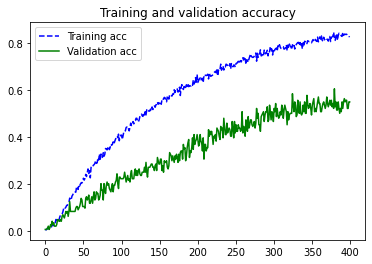

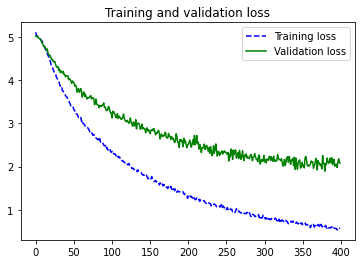

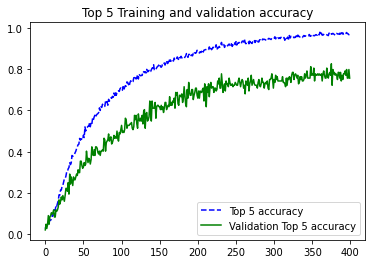

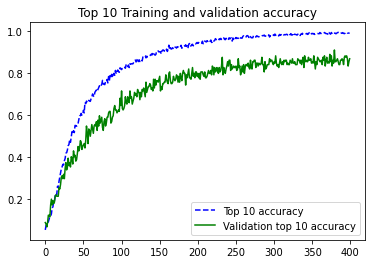

<Figure size 432x288 with 0 Axes>

In [55]:
plot_training_analysis()

In [27]:
# def top5(my_model, test_set, validation_set):

#   """ Compute top5 accuracy of the model over test and validation set"""

#   prediction_test = my_model.predict(test_set)
#   prediction_validation = my_model.predict(validation_set)

#   ind = np.argmax(prediction_validation[0, :])
#   #print("model prediction validation", prediction_validation[0, :])
#   #print("vérification de la somme", np.sum(prediction_validation[0, :]))
#   #print("indice max", np.argmax(prediction_validation[0, :]))
#   #print("valeur_max", prediction_validation[0, ind])
#   top5_test = np.argsort(prediction_test, axis=1)[:, -5:]
#   top5_validation = np.argsort(prediction_validation, axis=1)[:, -5:]

#   #print(top5_test)
#   #print(top5_validation)

#   bonne_reponse_test = 0
#   i = 0
#   for labels in test_generator.labels:
#     #print("i =", i)
#     #print(labels)
#     #print(top5_test[i])
#     if (labels in top5_test[i, :]):
#       bonne_reponse_test += 1
#     i=i+1
#     #print(i)

#   bonne_reponse_validation = 0
#   i = 0
#   for labels in validation_generator.labels:
#     #print("i =", i)
#     #print("true label =", labels)
#     #print("top 5 label =", top5_validation[i])
#     if (labels in top5_validation[i, :]):
#       bonne_reponse_validation += 1
#     i=i+1

#   bonne_reponse_test /= 151
#   bonne_reponse_validation /= 151

#   return bonne_reponse_test*100, bonne_reponse_validation*100

In [28]:
# def top10(my_model, test_set, validation_set):

#   """ Compute top5 accuracy of the model over test and validation set"""

#   prediction_test = my_model.predict(test_set)
#   prediction_validation = my_model.predict(validation_set)

#   ind = np.argmax(prediction_validation[0, :])
#   #print("model prediction validation", prediction_validation[0, :])
#   #print("vérification de la somme", np.sum(prediction_validation[0, :]))
#   #print("indice max", np.argmax(prediction_validation[0, :]))
#   #print("valeur_max", prediction_validation[0, ind])
#   top10_test = np.argsort(prediction_test, axis=1)[:, -10:]
#   top10_validation = np.argsort(prediction_validation, axis=1)[:, -10:]

#   #print(top5_test)
#   #print(top5_validation)

#   bonne_reponse_test = 0
#   i = 0
#   for labels in test_generator.labels:
#     #print("i =", i)
#     #print(labels)
#     #print(top5_test[i])
#     if (labels in top10_test[i, :]):
#       bonne_reponse_test += 1
#     i=i+1
#     #print(i)

#   bonne_reponse_validation = 0
#   i = 0
#   for labels in validation_generator.labels:
#     #print("i =", i)
#     #print("true label =", labels)
#     #print("top 5 label =", top5_validation[i])
#     if (labels in top10_validation[i, :]):
#       bonne_reponse_validation += 1
#     i=i+1

#   bonne_reponse_test /= 151
#   bonne_reponse_validation /= 151

#   return bonne_reponse_test*100, bonne_reponse_validation*100

Augmentation des données avec "imgaug"

In [29]:
# from imgaug import augmenters as iaa

# seq = iaa.Sequential([
#     iaa.Fliplr(0.5), # horizontally flip 50% of the images
#     iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
# ])

In [30]:
# train_filenames = os.listdir(path_train_pokemon)

# print("Début des 50 data augmentations")
# for i in range(50):
#   print("i =", i)
#   for filename in train_filenames:
#     image = np.array(load_img(path_train_pokemon + filename))
#     image_aug = seq(images = image)

#     #Rescale to 0-255 and convert to uint8
#     rescaled = (255.0 / image_aug.max() * (image_aug - image_aug.min())).astype(np.uint8)
#     image_aug = Image.fromarray(rescaled)

#     image_aug.save(path_train_pokemon + filename.split(".")[0] + "-aug" + str(i) + ".png")

Augmentation des données avec le ImageDataGenerator

Found 1661 validated image filenames belonging to 151 classes.


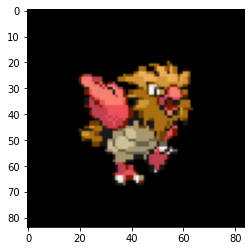

In [31]:
#Image d'entraînement augmenté
train_datagen_2 = ImageDataGenerator(
    rotation_range=40,
    rescale=1./255,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True
    )

train_generator_augmented = train_datagen_2.flow_from_dataframe(
    train_df, 
    path_train_pokemon,
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

x, y = train_generator_augmented.next()
for i in range(0, 1):
    image = x[i]
    plt.imshow(image)
    plt.show()

On vérifie que les données ont les bons labels

In [32]:
# train_filenames = os.listdir(path_train_pokemon)
# sample = random.randint(0, 84711)
# image = load_img(path_train_pokemon + train_filenames[sample])
# plt.imshow(image)
# print("label :", train_categories[sample])

In [58]:
conv_resnet = ResNet50(
              include_top=False,
              weights="imagenet",
              input_shape=(84, 84, 3),
              classes=151
)

conv_resnet.trainable = True

for layer in conv_resnet.layers:
    if layer.name == "res5c_branch2a" or layer.name == "res5c_branch2b" or layer.name == "res5c_branch2c":
      layer.trainable = True  
    else:
      layer.trainable = False

#Mon input c'est du 32 32 3
input = Input(shape=(84, 84, 3), name = 'image_input')

output_resnet = conv_resnet(input)

#On rajoute quelques layers
x = Flatten(name='flatten')(output_resnet)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dropout(0.2)(x)
x = Dense(151, activation='softmax', name='predictions')(x)

#Mon modele à moi
my_model_4 = Model(inputs=input, outputs=x)

my_model_4.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 84, 84, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               4718848   
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 256)               65792     
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0   

In [59]:
my_model_4.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc', top5_acc, top10_acc])

In [60]:
history = my_model_4.fit(train_generator_augmented,
                    steps_per_epoch=total_train//batch_size,
                    validation_data=validation_generator,
                    validation_steps=total_validate//batch_size,
                    epochs=400,
                    )

Epoch 1/400
103/103 [==============================] - 7s 47ms/step - loss: 5.1550 - acc: 0.0076 - top5_acc: 0.0295 - top10_acc: 0.0524 - val_loss: 5.0303 - val_acc: 0.0139 - val_top5_acc: 0.0417 - val_top10_acc: 0.0833
Epoch 2/400
103/103 [==============================] - 4s 37ms/step - loss: 5.0416 - acc: 0.0092 - top5_acc: 0.0434 - top10_acc: 0.0682 - val_loss: 5.0133 - val_acc: 0.0000e+00 - val_top5_acc: 0.0278 - val_top10_acc: 0.0972
Epoch 3/400
103/103 [==============================] - 4s 37ms/step - loss: 5.0218 - acc: 0.0050 - top5_acc: 0.0378 - top10_acc: 0.0708 - val_loss: 5.0046 - val_acc: 0.0208 - val_top5_acc: 0.0625 - val_top10_acc: 0.1250
Epoch 4/400
103/103 [==============================] - 4s 37ms/step - loss: 5.0163 - acc: 0.0101 - top5_acc: 0.0301 - top10_acc: 0.0624 - val_loss: 5.0051 - val_acc: 0.0139 - val_top5_acc: 0.0347 - val_top10_acc: 0.0903
Epoch 5/400
103/103 [==============================] - 4s 38ms/step - loss: 5.0044 - acc: 0.0065 - top5_acc: 0.0468 

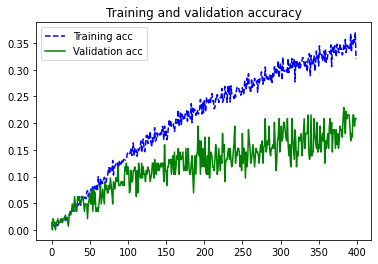

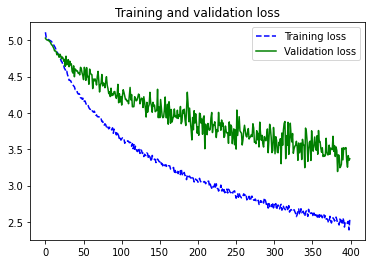

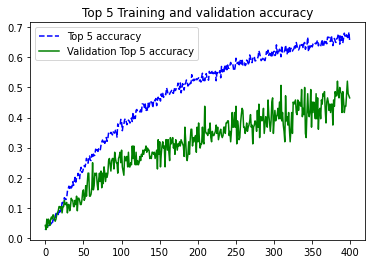

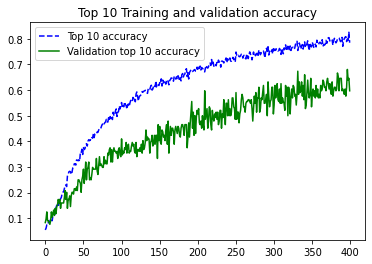

<Figure size 432x288 with 0 Axes>

In [61]:
plot_training_analysis()

La data augmentation ne fonctionne pas, mais tant pis. Nous allons tenter d'utiliser un auto-encoder, et utiliser son espace latent comme base à notre classifieur